This notebooks serves as data prepartion for modeling in subsequent files.

In [1]:
import json
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import PIL
from mpl_toolkits.basemap import Basemap

import warnings
warnings.filterwarnings("ignore")

**Load files**

Data was found online at Kaggle: https://www.kaggle.com/yelp-dataset/yelp-dataset. While other datasets are available, the team primarilty utilized the yelp_academic_dataset_business.json for this project.

In [2]:
!ls

DSGA1001_TermProject2019_FinalWriteUp_VegasFoodies.pdf
Data_Prep.ipynb
clean_data
raw_data


In [3]:
business_file_path = './raw_data/yelp_academic_dataset_business.json'
business_df = pd.read_json(business_file_path,lines=True)

**Exploratory Data Analysis**


In [4]:
business_df.shape

(188593, 15)

In [5]:
business_df.describe()

,latitude,longitude,stars,review_count,is_open
count,188587.000000,188587.000000,188593.000000,188593.000000,188593.000000
mean,38.506793,-97.490873,3.631550,31.797310,0.830391
std,5.122684,17.693360,1.016783,104.124212,0.375290
min,-71.753941,-180.000000,1.000000,3.000000,0.000000
25%,33.630878,-112.279276,3.000000,4.000000,1.000000
50%,36.143595,-111.777460,3.500000,9.000000,1.000000
75%,43.593106,-79.982958,4.500000,24.000000,1.000000
max,85.051129,115.086769,5.000000,7968.000000,1.000000


In [6]:
#Select only restaurants from many different categories

res = ["Restaurant", "restaurant"]
business_df['split_categories'] = 0

for i in range(len(business_df['categories'])):
  cat = str(business_df['categories'].iloc[i])
  cat.split(',')
  if any(item in cat for item in res):
    business_df['split_categories'].iloc[i] = 1

In [7]:
#Find out which city has the most listed restaurants on Yelp

restaurant = business_df[business_df['split_categories']==1]

city = restaurant['city'].unique().tolist()
city_count = {}
for i in city:
  count = restaurant[restaurant['city'] == i].shape[0]
  city_count.update({i:count})

In [8]:
#Find out which city has the most listed restaurants on Yelp that are still OPEN

restaurant_open = restaurant[restaurant['is_open']==1]
restaurant_open.describe()

,latitude,longitude,stars,review_count,is_open,split_categories
count,41359.000000,41359.000000,41359.000000,41359.000000,41359.0,41359.0
mean,40.362730,-91.057989,3.455935,75.321768,1.0,1.0
std,5.481968,18.466032,0.818189,181.254311,0.0,0.0
min,-71.753941,-123.587426,1.000000,3.000000,1.0,1.0
25%,35.367125,-112.039551,3.000000,8.000000,1.0,1.0
50%,41.417383,-80.963454,3.500000,24.000000,1.0,1.0
75%,43.755433,-79.420420,4.000000,71.000000,1.0,1.0
max,59.438181,114.086097,5.000000,7968.000000,1.0,1.0


In [9]:
city_count_open = {}
for i in city:
  count = restaurant_open[restaurant_open['city'] == i].shape[0]
  city_count_open.update({i:count})

In [10]:
#Find the two cities that have the most restaurants listed on Yelp

city_shortlist = {k:v for (k,v) in sorted(city_count.items(), key=lambda item: item[1]) if v > 4000}
city_shortlist

{'Las Vegas': 6153, 'Toronto': 7578}

In [11]:
#Export these results to csv file

restaurant.to_csv('./clean_data/restaurant.csv')

In [12]:
restaurant_open.to_csv('./clean_data/restaurant_open.csv')

#### EDA Geography:

Check out the geographic distributions of these restaurants. 

RESULTS: not much information since there does not really exist a cluster of good or bad restaurants, they  scatter quite similarly.

In [13]:
high_star_list = restaurant_open[restaurant_open.stars.astype('int')>=4]
low_star_list = restaurant_open[restaurant_open.stars.astype('int')<4]

In [14]:
geometry_high = [Point(xy) for xy in zip(high_star_list['longitude'],high_star_list['latitude'])]
geometry_low = [Point(xy) for xy in zip(low_star_list['longitude'],low_star_list['latitude'])]

In [15]:
geo_high = gpd.GeoDataFrame(high_star_list, geometry = geometry_high)
geo_low = gpd.GeoDataFrame(low_star_list, geometry = geometry_low)
geo_high.shape, geo_low.shape

((16786, 17), (24573, 17))

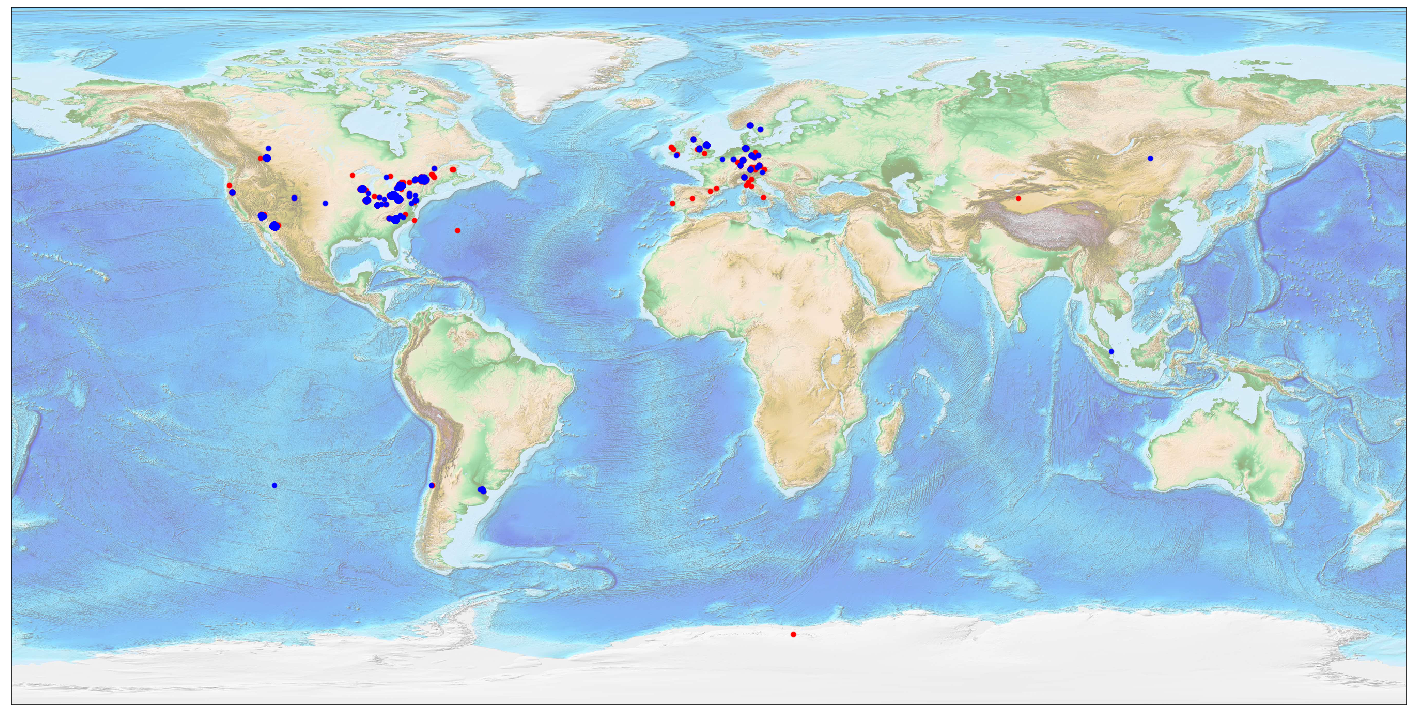

In [16]:
fig,ax = plt.subplots(figsize =[25,25])

m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180 )

m.etopo(ax = ax,scale=0.5, alpha=0.5)

geo_high.plot(ax= ax, color = 'red',markersize = 20)
geo_low.plot(ax= ax,color = 'blue',markersize = 20)